# Income Prediction

<p>In this Project, we are going to predict whether a person's annual income is above \$50K or below $50K using various features like age, education, workclass, country, occupation etc. And this is a binary classification problem. The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features.</p>

### The importance of census statistics

The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and solve existing problems. Statistical information, which serves as the basis for constructing planning forecasts, is essential for the democratic process since it enables the citizens to examine the decisions made by the government and local authorities, and decide whether they serve the public they are meant to help.


** *1. Categorical Attributes* **
 * **workclass**: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  -  Individual work category  
 * **education**: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  -  Individual's highest education degree  
 * **marital-status**: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  -  Individual marital status  
 * **occupation**: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  -  Individual's occupation  
 * **relationship**: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  -  Individual's relation in a family   
 * **race**: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  -  Race of Individual   
 * **sex**: (categorical) Female, Male.
 * **native-country**: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  -  Individual's native country   

** *2. Categorical Attributes* **
 * **age**: continuous.
  -  Age of an individual  
 * **education-num**: number of education year, continuous.
  -  Individual's year of receiving education
 * **fnlwgt**: final weight, continuous. 
 * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.
 * **capital-gain**: continuous.
 * **capital-loss**: continuous.
 * **hours-per-week**: continuous.
  -  Individual's working hour per week   

# Importing libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

# Loading the raw data

In [2]:
# Importing dataset
train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)

# Columns name we can find from data description 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

train_data.columns = col_labels

In [4]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Making sure that the data does not contain unecessary spaces.
train_data=train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [4]:
# Before any analysis, let's do the level encoding of the target column.
train_data['income'] = train_data['income'].replace({'<=50K':0,'>50K':1})

# Exploratory Data Analysis & Preprocessing

**Exploring the descriptive statistics of the variables**

In [5]:
train_data.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [6]:
# Information of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


## Check for any missing value in data set

In [7]:
# Checking nan values
train_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
# checking '?' in our dataset
train_data.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

*--From above we can see that no missing values are present in our training dataset, but instead missing values are present in the form of '?', So I replaced this '?' with np.nan.*

In [9]:
# We are replacing '?' with np.nan
train_data = train_data.replace(to_replace='?', value=np.nan)

# Now again checking missing values
print("\n ----Missing values---\n")
print(train_data.isna().sum())

# Missing values in percentage
print("\n ----Missing values in percentage---\n")
print(round((train_data.isna().sum()/train_data.shape[0])*100,2))
print("\n---Total {}% of missing values present in our dataset".
      format(round(sum(train_data.isna().sum()/train_data.shape[0])*100,2)))


 ----Missing values---

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

 ----Missing values in percentage---

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education_num     0.00
marital_status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital_gain      0.00
capital_loss      0.00
hours_per_week    0.00
native_country    1.79
income            0.00
dtype: float64

---Total 13.09% of missing values present in our dataset


*--In our training datasets Total 13.09% of missing values present in our dataset & missing values are only present in **'workclass'**, **'occupation'** and **'native_country'** column and These three columns are categorical columns.*

## Imputing the missing values

In [20]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
from feature_engine.imputation import CategoricalImputer
imputer = CategoricalImputer()

In [29]:
# Imputing the missing values

w_data = np.array(train_data['workclass'], dtype=object)
c_data = np.array(train_data['occupation'], dtype=object)
n_data = np.array(train_data['native_country'], dtype=object)
w = w_data.reshape(-1,1)
c = c_data.reshape(-1,1)
n = n_data.reshape(-1,1)

train_data['workclass'] = imputer.fit_transform(w)
train_data['occupation'] = imputer.fit_transform(c)
train_data['native_country'] = imputer.fit_transform(n)

In [30]:
# Again checking missing values after imputation
train_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Data Exploration

**Data Exploration & Visualization**

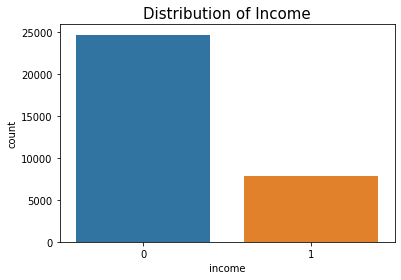

In [31]:
# Checking label counts
sns.countplot(x='income', data=train_data)
plt.title("Distribution of Income", fontsize = 15)
plt.show()

In [32]:
print('-> Total No. of records : {}\n'.format(len(train_data)))

print('-> Number of people making more that >50K : {}%\n'.format(
    round((len(train_data[train_data['income']==1])/32561)*100, 2)))

print('-> Number of people making less than or equal to <=50K : {}%'.format(
    round((len(train_data[train_data['income']==0])/32561)*100, 2)))

-> Total No. of records : 32561

-> Number of people making more that >50K : 24.08%

-> Number of people making less than or equal to <=50K : 75.92%


*The distribution of the target column, we would find that the people with less than 50K annual income are 75.92% and the no. of people making more than 50K is 24.08%, so it's clear that the dataset is unbalanced.*

## Age

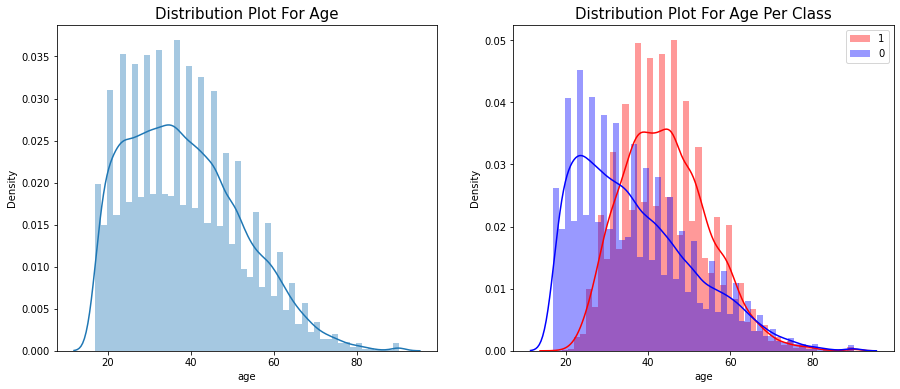

In [33]:
# Distribution plot for age column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(train_data['age'])
plt.title('Distribution Plot For Age', fontsize = 15)

# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(train_data[train_data['income']==1]['age'], label='1', color='red')
sns.distplot(train_data[train_data['income']==0]['age'], label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

* *On taking a look at the result of distribution plot for age column, I can see that the most no of people are young.*
* *And The distributions for age per class have some overlap on the far right-hand side.*
* *By looking distribution plot for age per class graph we can say that there are relatively less young people who have an annual income is more than 50K.*

## Workclass

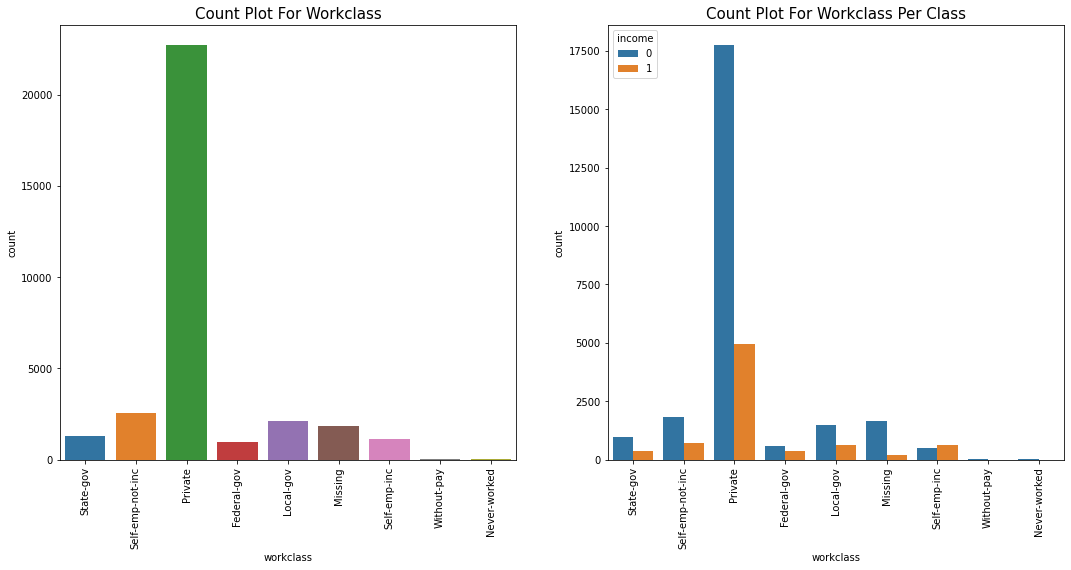

In [34]:
# Countplot for workclass column
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(train_data['workclass'])
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=train_data, x='workclass', hue='income')
plt.title("Count Plot For Workclass Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

* *In this dataset most number of people are working in private sector.*
* *Taking look at the second plot above, I can see that who have an annual income is more than 50K or less than 50K are work in private.*

## Education and Education Number

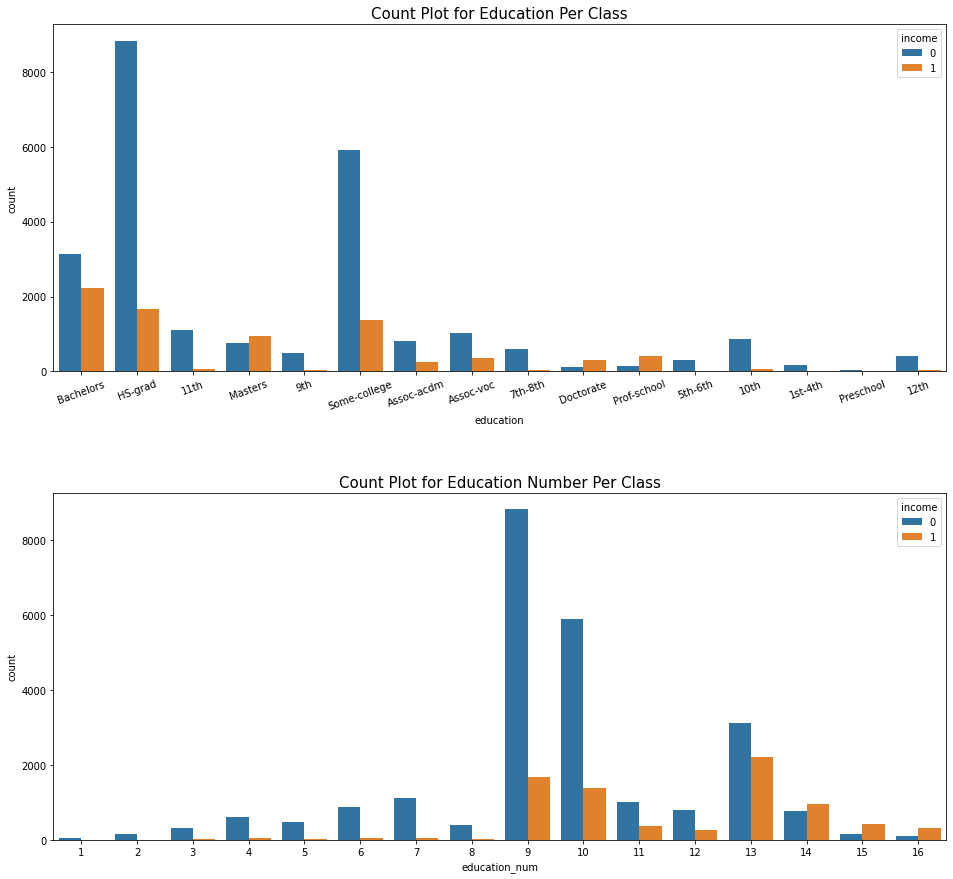

In [35]:
# Count Plot for Education Per Class
plt.figure(figsize=[16,15])
plt.subplot(2,1,1)
sns.countplot(x='education', data=train_data, hue='income')
plt.xticks(rotation=20)
plt.title("Count Plot for Education Per Class", fontsize = 15)

# Count Plot for Education Number Per Class
plt.subplot(2,1,2)
sns.countplot(x='education_num', data=train_data, hue='income')
plt.title("Count Plot for Education Number Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.35)

In [36]:
education_classes = train_data['education'].unique()
for educ_class in education_classes:
    print("{}, the Education Number is {}".
          format(educ_class, train_data[train_data['education'] == educ_class]['education_num'].unique()))

Bachelors, the Education Number is [13]
HS-grad, the Education Number is [9]
11th, the Education Number is [7]
Masters, the Education Number is [14]
9th, the Education Number is [5]
Some-college, the Education Number is [10]
Assoc-acdm, the Education Number is [12]
Assoc-voc, the Education Number is [11]
7th-8th, the Education Number is [4]
Doctorate, the Education Number is [16]
Prof-school, the Education Number is [15]
5th-6th, the Education Number is [3]
10th, the Education Number is [6]
1st-4th, the Education Number is [2]
Preschool, the Education Number is [1]
12th, the Education Number is [8]


In [37]:
# education & education number column are just the same, so I am dropping education number column.
train_data.drop(labels='education_num', axis=1, inplace=True)

* *From the analysis above, It's clear that **education** & **education number** column are **just the same.** so I am dropping education number column.*

* *And In this dataset Most number of people are high school graduates with 9 to 10 years of education.* 

## Gender

Text(0.5, 1.0, 'Countplot for Gender Per Class')

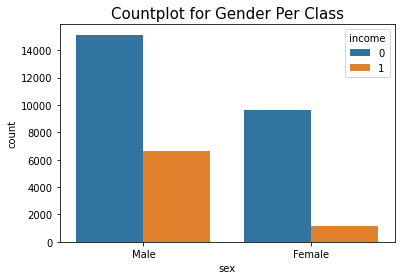

In [38]:
# Count Plot For Gender Per Class
sns.countplot(x='sex' ,data=train_data, hue='income')
plt.title("Countplot for Gender Per Class", fontsize = 15)

* *The number of male candidates are more than female.*
* *When Comparing male and female, more percentage of male candidates are earn more than 50K.*

## Maritial Status

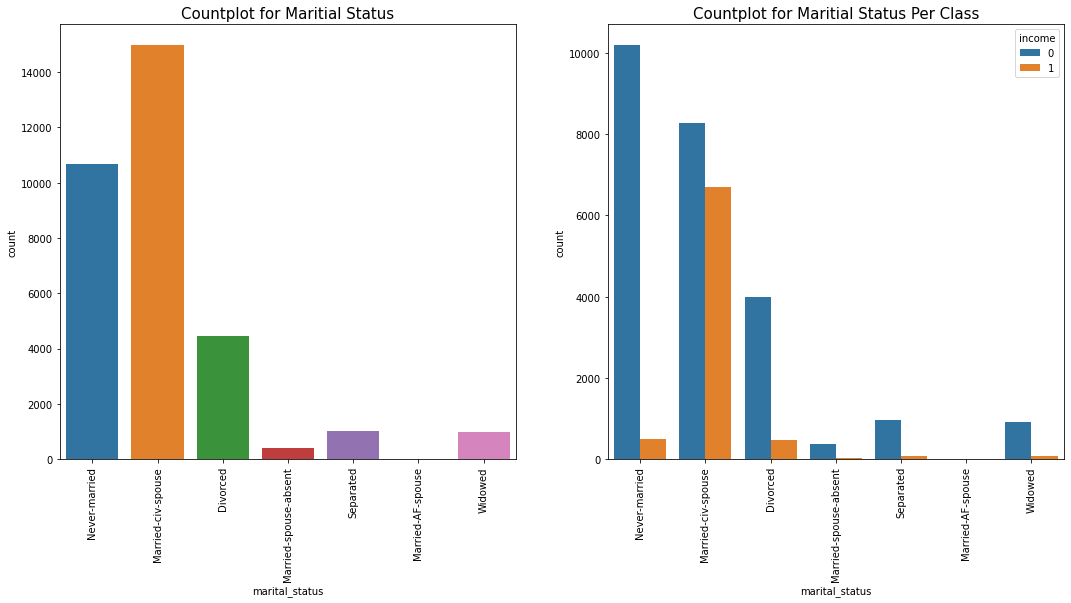


 --Value Counts-- 

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


In [39]:
# Countplot for Maritial Status
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(train_data['marital_status'])
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for Maritial Status Per Class
plt.subplot(1,2,2)
sns.countplot(train_data['marital_status'],hue=train_data['income'])
plt.title("Countplot for Maritial Status Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(train_data['marital_status'].value_counts())

* *Most of the people whose annual income is more than 50K, their marital status is married.*

In [40]:
# Transforming Maritial Status column with value as either married or not married.
train_data = train_data.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})

## Relationship

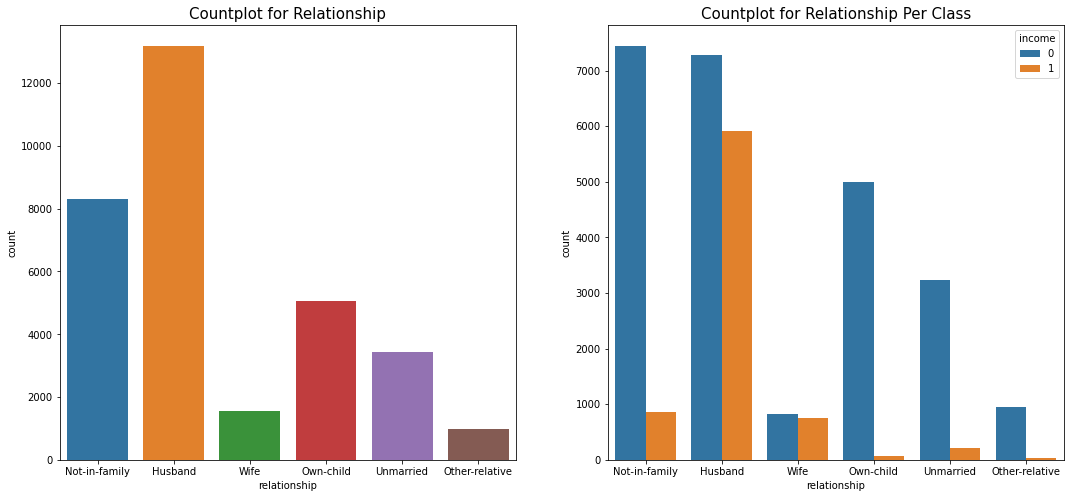


 --Value Counts-- 

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [41]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(train_data['relationship'])
plt.title('Countplot for Relationship', fontsize = 15)


plt.subplot(1,2,2)
sns.countplot(train_data['relationship'],hue=train_data['income'])
plt.title('Countplot for Relationship Per Class', fontsize = 15)
plt.show()

print('\n --Value Counts-- \n')
print(train_data['relationship'].value_counts())

## Race

Text(0.5, 1.0, 'Countplot for Race Per Class')

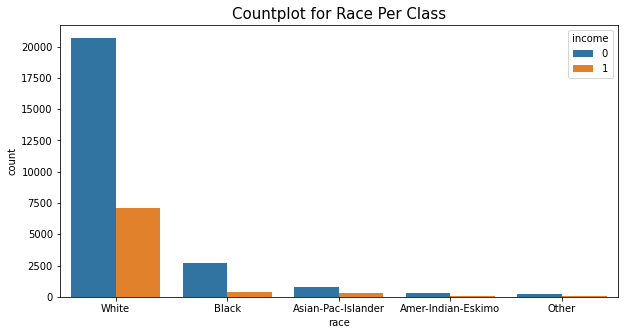

In [42]:
plt.figure(figsize=[10,5])
sns.countplot(train_data['race'], hue=train_data['income'])
plt.title('Countplot for Race Per Class', fontsize = 15)

* *In this dataset majority of information about white race is more while all other races are lesser.*

## Country

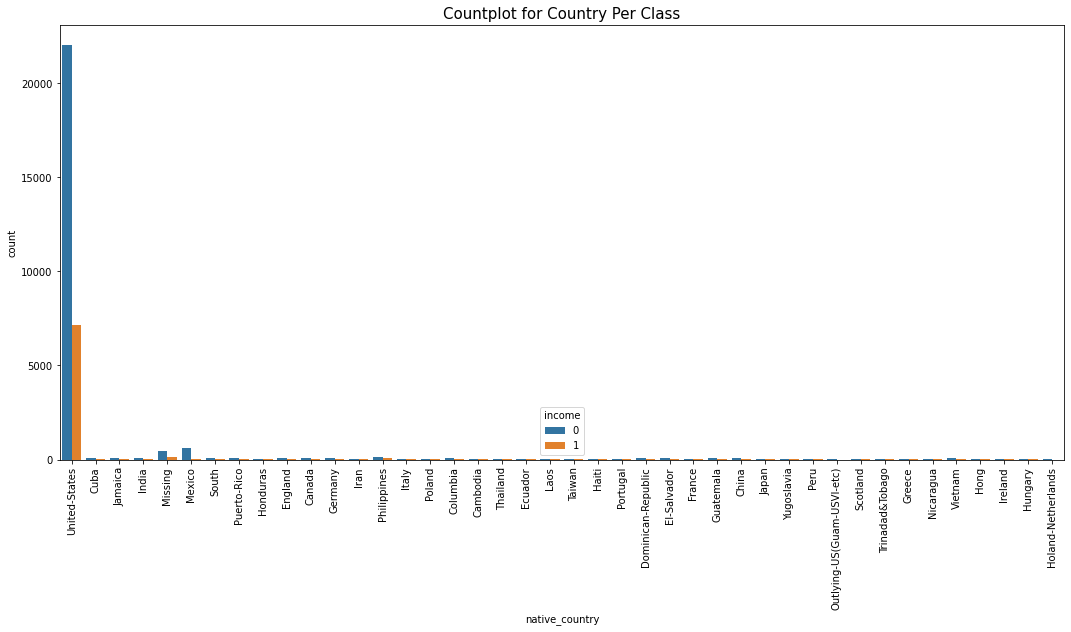


 --Value Counts-- 

United-States                 29170
Mexico                          643
Missing                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France 

In [43]:
plt.figure(figsize=[18,8])
sns.countplot(train_data['native_country'],hue=train_data['income'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(train_data['native_country'].value_counts())

print('\n-----------------------------------')
print('{}% people belong from united states.'
      .format(round(len(train_data[train_data['native_country']=='United-States'])/32561*100,2)))

print('{}% people belong from other country.'
      .format(round(len(train_data[train_data['native_country']!='United-States'])/32561*100,2)))

* *From analysis above, 91.38% peoples are from United-states and only 8.62% people belong from other countries.*
* *And There are 41 countries in this column, so it's better if we transform this feature with value as either United States or Other*

In [44]:
# Transforming native country column with value as either United States or Other.
countries = train_data['native_country'].unique()[1:]
train_data['native_country'] = train_data['native_country'].replace(to_replace=countries, value='Other')

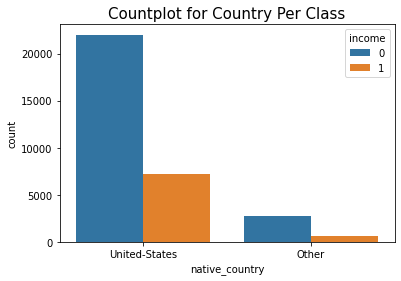

In [45]:
# Countplot for Country Per Class
sns.countplot(train_data['native_country'], hue=train_data['income'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()

* *Now it's look good*

## Occupation

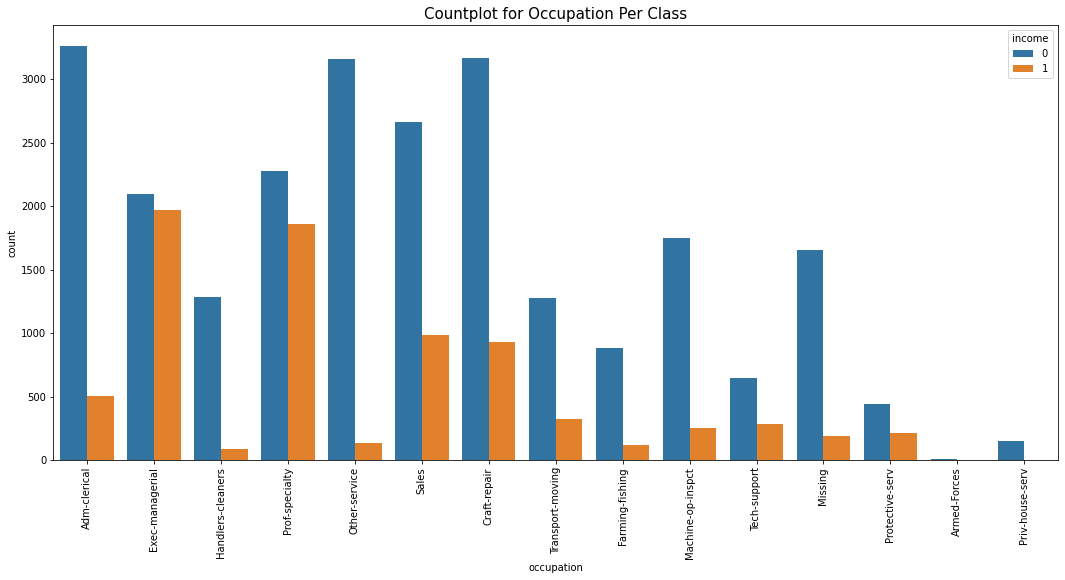

In [46]:
plt.figure(figsize=[18,8])
sns.countplot(train_data['occupation'], hue=train_data['income'])
plt.title('Countplot for Occupation Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

* *In occupation column the values are well distributed in all categories*

## Hours per week

Text(0.5, 1.0, 'Distribution plot for hours per week')

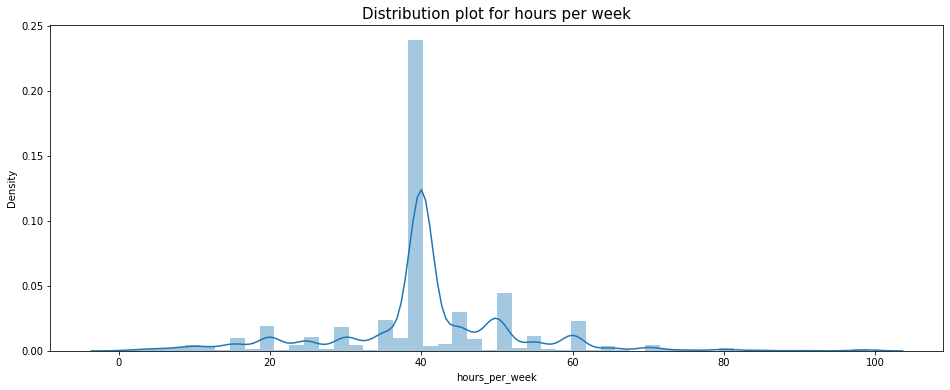

In [47]:
# Distribution plot for hours per week column
plt.figure(figsize=[16,6])
sns.distplot(train_data['hours_per_week'])
plt.title('Distribution plot for hours per week', fontsize = 15)

* *By looking distribution plot for hours per weak column our data is aligned around the centre.*
* *In this dataset most of the people work 30 to 40 hours per week*

# Dealing with Categorical Variables

In [48]:
# Categorical features
cat_df = train_data.select_dtypes(include=['object'])
num_df = train_data.select_dtypes(include=['int64'])

# Categorical column with their unique value
for i in cat_df.columns:
    print("{} : {} \n".format(i, cat_df[i].unique()))

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Missing' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status : ['not married' 'married'] 

occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Missing'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex : ['Male' 'Female'] 

native_country : ['United-States' 'Other'] 



In [49]:
# Creating dummies variables
train_data_dummie = pd.get_dummies(train_data,drop_first=True)
train_data_dummie.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Missing,workclass_Never-worked,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_United-States
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,38,215646,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
3,53,234721,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
4,28,338409,0,0,40,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [50]:
print("Total No. of features after creating dummie variable : {}\n".format(len(train_data_dummie.columns)))
print('--Features--\n')
for i in train_data_dummie.columns:
    print(i)
print('---------------------------')

Total No. of features after creating dummie variable : 55

--Features--

age
fnlwgt
capital_gain
capital_loss
hours_per_week
income
workclass_Local-gov
workclass_Missing
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital_status_not married
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Missing
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving
relationship_Not-in-family
relationsh

# Feature selection

In [51]:
from sklearn.preprocessing import LabelEncoder
temp_data = train_data.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['income'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

marital_status    0.434944
relationship      0.250918
age               0.234037
hours_per_week    0.229689
capital_gain      0.223329
sex               0.215980
capital_loss      0.150526
education         0.079317
race              0.071846
occupation        0.045396
native_country    0.034470
workclass         0.014869
fnlwgt            0.009463
dtype: float64


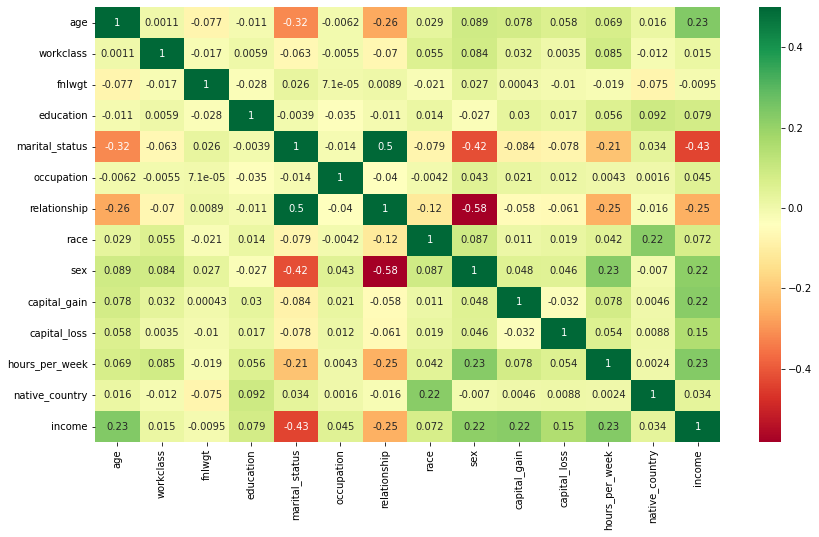

In [52]:
# Correlation Heatmap
plt.figure(figsize=[14,8])
sns.heatmap(temp_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

In [53]:
# Droping those features which we are not going to use
final_features = train_data_dummie.drop(['fnlwgt','workclass_Local-gov', 'workclass_Never-worked','workclass_Private',
                                         'workclass_Self-emp-inc','workclass_Self-emp-not-inc', 'workclass_State-gov',
                                         'workclass_Without-pay'], axis=1)


In [85]:
len(final_features.columns)

47

In [82]:
# storing the final struture data into csv

final_features.to_csv("Income_data.csv")

# Model Development

### Declaring dependent and independent variable

In [54]:
X = final_features.drop(['income'],axis=1)
y = final_features['income']

### Feature Scaling

In [55]:
# Feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])

StandardScaler()

In [56]:
input_scaled = scaler.transform(X[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age', 'capital_gain', 'capital_loss', 'hours_per_week'])

In [59]:
scaled_data

,age,capital_gain,capital_loss,hours_per_week
0,0.030671,0.148453,-0.21666,-0.035429
1,0.837109,-0.145920,-0.21666,-2.222153
2,-0.042642,-0.145920,-0.21666,-0.035429
3,1.057047,-0.145920,-0.21666,-0.035429
4,-0.775768,-0.145920,-0.21666,-0.035429
...,...,...,...,...
32556,-0.849080,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.145920,-0.21666,-0.035429
32559,-1.215643,-0.145920,-0.21666,-1.655225


In [57]:
X_scaled = scaled_data.join(X.drop(['age','capital_gain', 'capital_loss','hours_per_week'],axis=1))

In [58]:
X_scaled

,age,capital_gain,capital_loss,hours_per_week,workclass_Missing,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_United-States
0,0.030671,0.148453,-0.21666,-0.035429,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0.837109,-0.145920,-0.21666,-2.222153,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,-0.042642,-0.145920,-0.21666,-0.035429,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,1.057047,-0.145920,-0.21666,-0.035429,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,-0.775768,-0.145920,-0.21666,-0.035429,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,-0.145920,-0.21666,-0.197409,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
32557,0.103983,-0.145920,-0.21666,-0.035429,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
32558,1.423610,-0.145920,-0.21666,-0.035429,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
32559,-1.215643,-0.145920,-0.21666,-1.655225,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,1


### Fixing imbalanced dataset

In [61]:
# Fixing imbalanced dataset by oversampling
rd_over_sample = RandomOverSampler()
X_sampled, y_sampled = rd_over_sample.fit_resample(X_scaled,y)

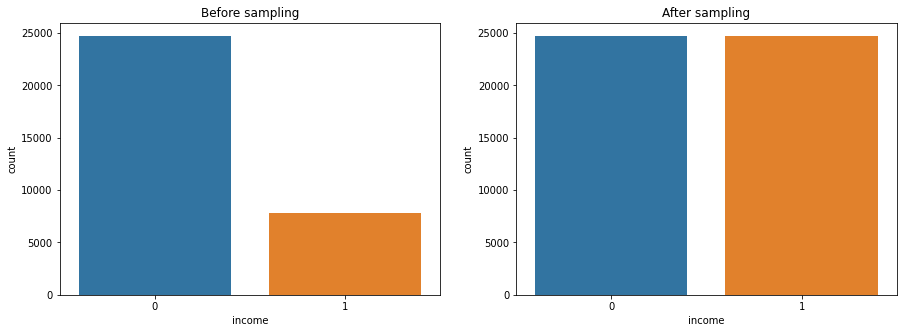

Before sampling : 
0    24720
1     7841
Name: income, dtype: int64

After sampling : 
0    24720
1    24720
Name: income, dtype: int64


In [62]:
# Plot Before sampling
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(train_data_dummie['income'])
plt.title("Before sampling")

# Plot After sampling
plt.subplot(1,2,2)
sns.countplot(y_sampled.squeeze())
plt.title("After sampling")
plt.show()

print('Before sampling : \n{}'.format(y.value_counts()))
print('\nAfter sampling : \n{}'.format(y_sampled.value_counts()))

### Training and Testing Data

In [63]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

# Logistic Regression Model

In [64]:
# Model Building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)
y_pred_train_lr = lr.predict(x_train)

In [65]:
print("-----Test Data Accuracy----")
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_lr), 4))
print('F1 score:', round(f1_score(y_test, y_pred_lr), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_lr), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_lr), 4))

-----Test Data Accuracy----
Logistic Regression:
Accuracy score: 0.8247
F1 score: 0.8258

-----Train Data Accuracy----
Accuracy score: 0.8217
F1 score: 0.8266


# Decision Tree Classifier

In [66]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=0)

# Training Model
dt.fit(x_train,y_train)
 
# Model Summary
y_pred_dt = dt.predict(x_test)
y_pred_train_dt = dt.predict(x_train)

In [67]:
print("-----Test Data Accuracy----")
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 4))
print('F1 score:', round(f1_score(y_test, y_pred_dt), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_dt), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_dt), 4))

-----Test Data Accuracy----
Decision Tree Classifier:
Accuracy score: 0.8228
F1 score: 0.8348

-----Train Data Accuracy----
Accuracy score: 0.8273
F1 score: 0.8412


# Random Forest Classifier

In [68]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=30)

# Training Model
rfc.fit(x_train,y_train)

# Model summary
y_pred_rfc = rfc.predict(x_test)
y_pred_train_rfc = rfc.predict(x_train)

In [69]:
print("-----Test Data Accuracy----")
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 4))
print('F1 score:', round(f1_score(y_test, y_pred_rfc), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_rfc), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_rfc), 4))

-----Test Data Accuracy----
Random Forest Classifier:
Accuracy score: 0.8228
F1 score: 0.9094

-----Train Data Accuracy----
Accuracy score: 0.9538
F1 score: 0.9555


# GradientBoosting Classifier

In [70]:
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
gbtc = GradientBoostingClassifier(random_state=0)

# Training Model
gbtc.fit(x_train,y_train)

# Model summary
y_pred_gbtc = gbtc.predict(x_test)
y_pred_train_gbtc = gbtc.predict(x_train)

In [71]:
print("-----Test Data Accuracy----")
print('GradientBoostingClassifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gbtc), 4))
print('F1 score:', round(f1_score(y_test, y_pred_gbtc), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_gbtc), 4))
print('F1 score:', round(f1_score(y_train, y_pred_train_gbtc), 4))

-----Test Data Accuracy----
GradientBoostingClassifier:
Accuracy score: 0.8445
F1 score: 0.8476

-----Train Data Accuracy----
Accuracy score: 0.8364
F1 score: 0.8422


# XGBoost Classifier

In [72]:
# Model Building
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)

# Training Model
xgb.fit(x_train, y_train)

# Mode summary
y_pred_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)

In [73]:
print("-----Test Data Accuracy----")
print('XGB Classifier:')
print('Accuracy score:',round(accuracy_score(y_test, y_pred_xgb), 4))
print('F1 score:',round(f1_score(y_test, y_pred_xgb), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:',round(accuracy_score(y_train, y_pred_train_xgb), 4))
print('F1 score:',round(f1_score(y_train, y_pred_train_xgb), 4))

-----Test Data Accuracy----
XGB Classifier:
Accuracy score: 0.8696
F1 score: 0.8728

-----Train Data Accuracy----
Accuracy score: 0.8806
F1 score: 0.8852


# Hyperparameter Optimization

In [74]:
# XGB Classifier Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

classifier=XGBClassifier()
random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=5,verbose=3)

In [75]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [76]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [77]:
# Again Training our model with best parameter
xgb_tune = XGBClassifier(random_state=0,min_child_weight=3,max_depth= 15,
                    learning_rate = 0.1,gamma= 0.1,
                    colsample_bytree= 0.7)
xgb_tune.fit(x_train,y_train)
y_pred_xgb_tune = xgb_tune.predict(x_test)

# Analysing Results

In [78]:
print("-----Test Data Accuracy----")
print('Gradient Boosting Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb_tune), 3))
print('F1 score:', round(f1_score(y_test, y_pred_xgb_tune), 2))

-----Test Data Accuracy----
Gradient Boosting Classifier:
Accuracy score: 0.876
F1 score: 0.88


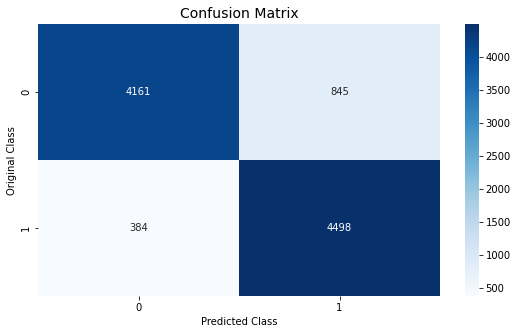

In [79]:
# Plot confusion matrix
plt.figure(figsize=[9,5])
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tune), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize = 14)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [80]:
# Classificaton Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_tune))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      5006
           1       0.84      0.92      0.88      4882

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888



### ROC Curve

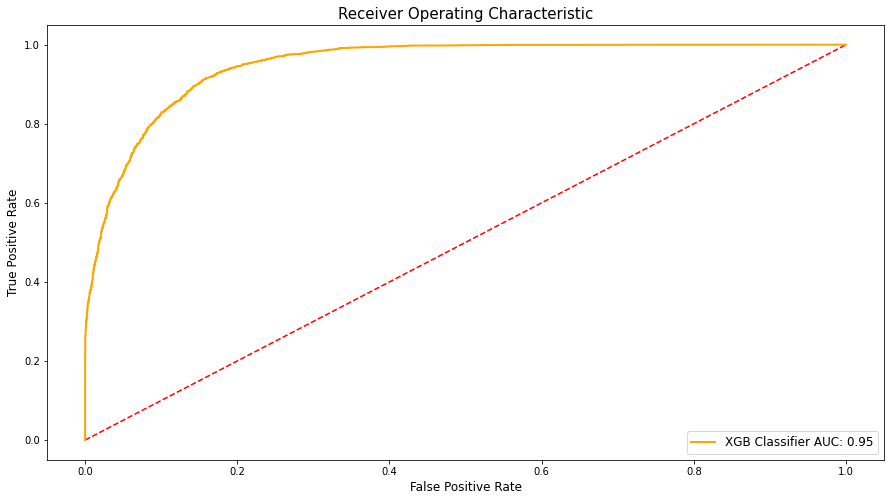

In [81]:
# Plot Receiver Operating Characteristic
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (15, 8))
plt.plot([0,1], [0,1], 'r--')

probs = xgb_tune.predict_proba(x_test)
# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'XGB Classifier' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'orange', label = label, linewidth = 2)
    
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Receiver Operating Characteristic', fontsize = 15)
plt.legend(loc = 'lower right',fontsize = 12)
plt.show()

# Conclusions:

* So as we try different Classification Alorithms and found that **"XGBoost Classifier"** is Performed the best with an **F1 score of 0.88**,  **AUC Score of 0.95** and **Accuracy score of 0.87**

* I also Performed **hyperparameter tuning** on XGBoost classifier and get the best tuned parameter.
* Used multiple Performance metrics to ensure that the model is performing correctly and is not overfitting on the data.

* While doing exploratory analysis, I found out that the most no. of people are young. But relatively less young people who have an annual income is more than $50K.

* In this dataset The most number of people are young, white, male, high school graduates with 9 to 10 years of education, work 40 hours per week and belong from United-States.